In [1]:
import pandas as pd
from os import walk
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#merge 12 months of data
file_names=[file for file in os.listdir() if file!='.gitignore' and file!='myenv' and file!='sales_analysis.ipynb']

def creating_merged_file(file_names,output_file_name):
    with open(output_file_name, 'w', encoding='utf-8') as output_file:
        for file_path in file_names:
            with open(file_path, 'r', encoding='utf-8') as input_file:
                for line in input_file:
                    output_file.write(line)
            output_file.write('\n') 
    return output_file_name
output_file_name= 'output-file.csv'  
creating_merged_file(file_names,output_file_name)

'output-file.csv'

<Axes: >

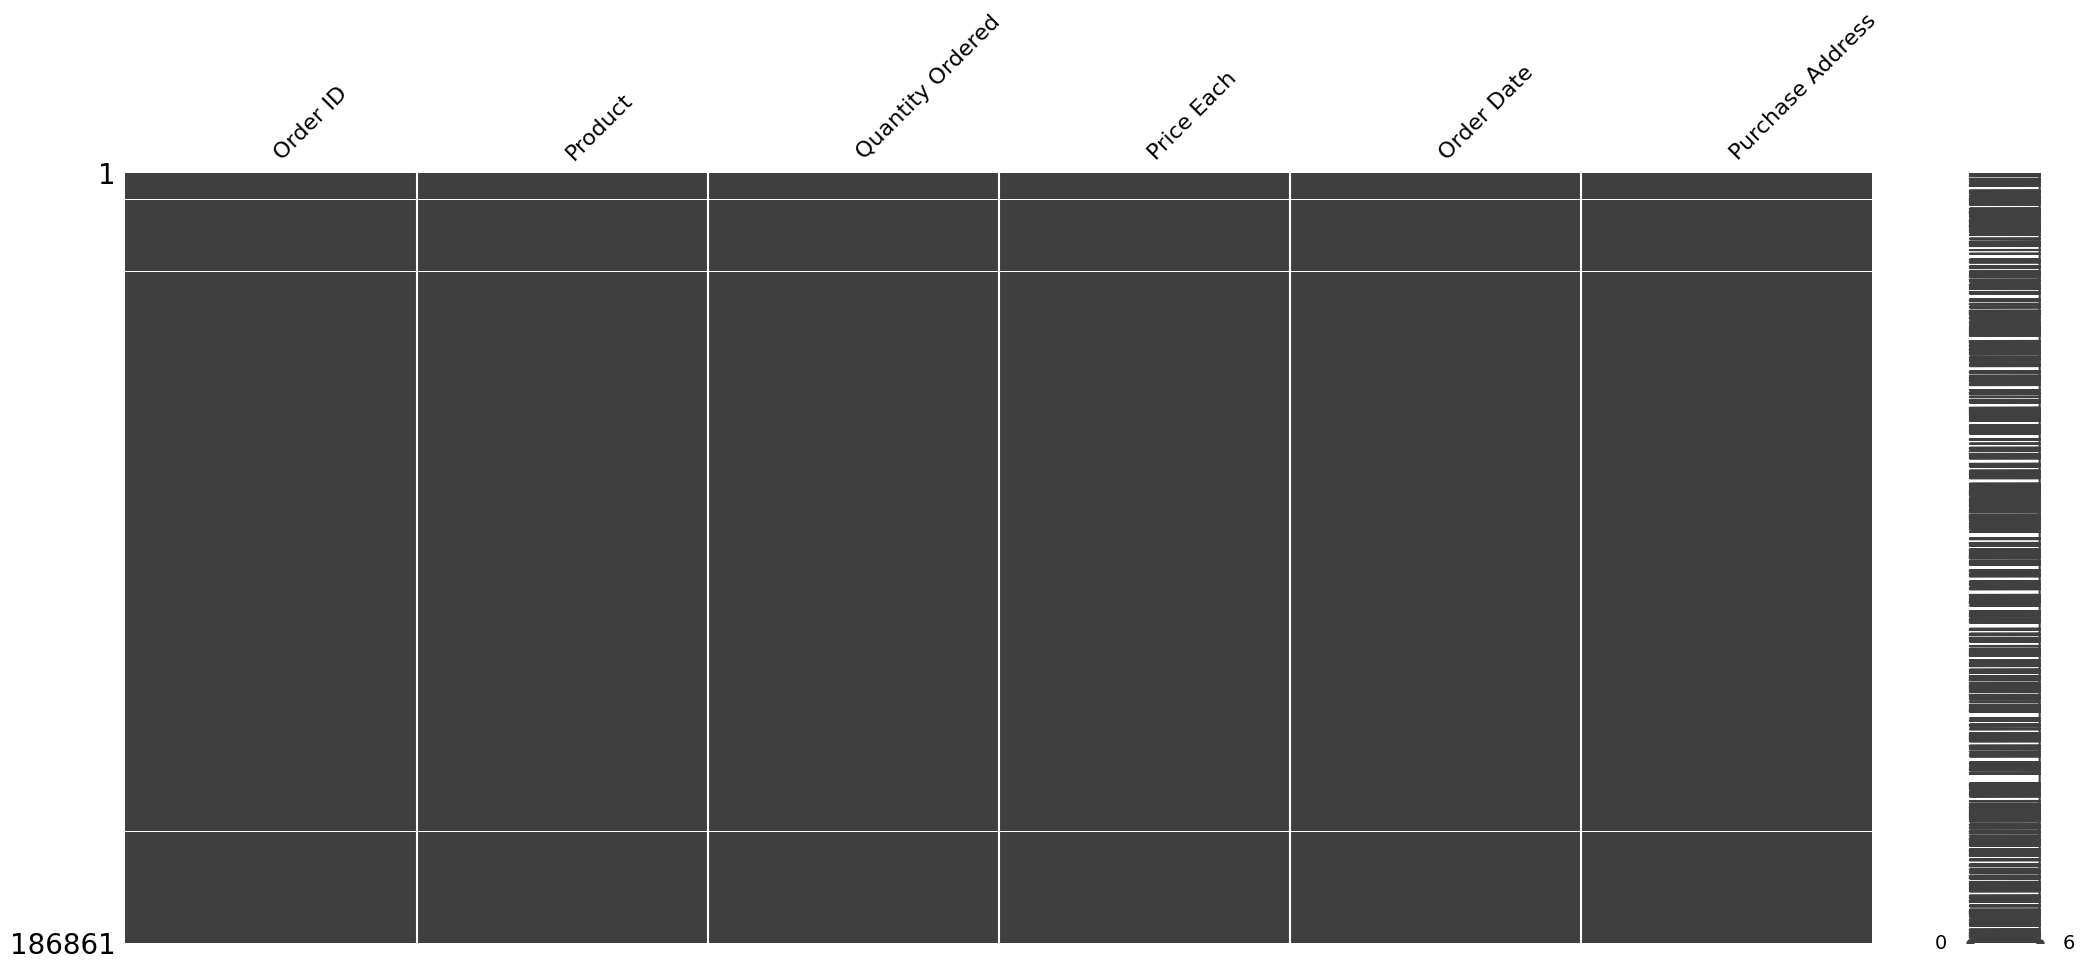

In [3]:
data=pd.read_csv(output_file_name)
data_df=pd.DataFrame(data)
msno.matrix(data_df)

In [4]:
data_df_null=data_df.isna().sum()
data_df_null

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
data_df=data_df.dropna()

In [6]:
data_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
data_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
data_df['Quantity Ordered']=pd.to_numeric(data_df['Quantity Ordered'],errors='coerce')
data_df['Price Each']=pd.to_numeric(data_df['Price Each'],errors='coerce')

In [9]:
data_df['Order Month']=data_df['Order Date'].str[0:2]
data_df['Order Month']=data_df['Order Month'].replace('Or','')
data_df['Order Month']=pd.to_numeric(data_df['Order Month'],errors='coerce')

In [10]:
data_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0
...,...,...,...,...,...,...,...
186856,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9.0
186857,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9.0
186858,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9.0
186859,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9.0


In [11]:
#find the most sold product ever
grouped_data_sales_quantity = data_df.groupby(['Product'])['Quantity Ordered'].sum()
sorted_data_sales_quantity = grouped_data_sales_quantity.sort_values(ascending=False)
result_sales_quantity=sorted_data_sales_quantity.reset_index(drop=False)
result_sales_quantity.index+=1
result_sales_quantity


,Product,Quantity Ordered
1,AAA Batteries (4-pack),31017.0
2,AA Batteries (4-pack),27635.0
3,USB-C Charging Cable,23975.0
4,Lightning Charging Cable,23217.0
5,Wired Headphones,20557.0
6,Apple Airpods Headphones,15661.0
7,Bose SoundSport Headphones,13457.0
8,27in FHD Monitor,7550.0
9,iPhone,6849.0
10,27in 4K Gaming Monitor,6244.0


In [27]:
#find the most profitable product
price_quantity_review=data_df.groupby(['Product'])[['Quantity Ordered','Price Each']].sum()
price_quantity_review=price_quantity_review.rename(columns={'Price Each':'Total Sold'})
price_quantity_review=price_quantity_review.sort_values(by='Total Sold',ascending=False)
price_quantity_review=price_quantity_review.reset_index()


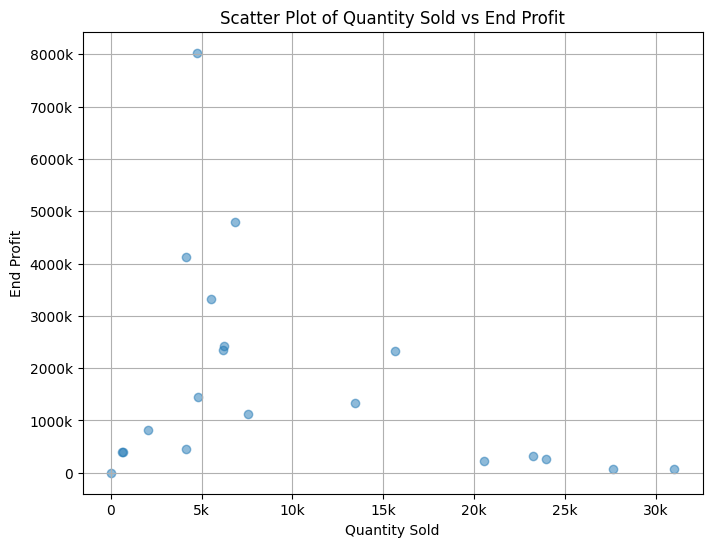

In [30]:
#is there any correlation between the sales quantity and the resulted profits?


plt.figure(figsize=(8, 6))
plt.scatter(price_quantity_review['Quantity Ordered'], price_quantity_review['Total Sold'], alpha=0.5)
plt.title('Scatter Plot of Quantity Sold vs End Profit')
plt.xlabel('Quantity Sold')
plt.ylabel('End Profit')

# Function to format quantity sold axis labels
def format_quantity_x(x, pos):
    if x >= 1000:
        return '{:.0f}k'.format(x * 1e-3)
    return '{:.0f}'.format(x)

def format_quantity_y(y, pos):
    if y >= 1000:
        return '{:.0f}k'.format(y * 1e-3)
    return '{:.0f}'.format(y)

plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(format_quantity_x))
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(format_quantity_y))

    
plt.grid(True)
plt.show()

                                 